# 1ª Parte do Projeto - Caracterização dos dados
Universidade Aberta

Mestrado em Engenhencia Informática e Tecnologia Web

Deep Learning Aplicado 2024/2025

### Projeto Final 
Luís Peixoto - 2402741



# 1. Caracterização do conjunto de dados
## 1.1. Descrição do dataset
O presente projeto utiliza um conjunto de dados privado, fornecidos pelo docente António Cunha, que foi especialmente preparado para tarefas de deteção de anomalias em imagens capturadas durante vídeos de endoscopias por cápsula. Este tipo de exame é amplamente utilizado para inspecionar o trato gastrointestinal, permitindo assim uma visualização interna detalhada.
Este dataset inclui imagens cuidadosamente selecionadas e categorizadas em diferentes classes com base nas condições médicas identificadas. A utilização de dados privados reflete uma realidade comum na área da saúde, onde a privacidade e a proteção de dados são fundamentais.
A composição deste dataset apresenta uma oportunidade única para explorar a aplicação de técnicas de Deep Learning, mas também vem com desafios adicionais, como o desbalanceamento entre classes e a variabilidade de imagens devido a diferentes condições de iluminação, qualidade de imagem e distorções.

O dataset é composto por um total de **18,481** imagens, distribuídas por **10 classes** diferentes, que podem ser agrupadas em três catergorias principais:
1. **Classes de anomalias específicas**: Representam imagens que identificam doenças ou condições médicas bem definidas, como pólipos ou hemorragias.
2. **Classes de anomalias genéricas**: Contêm imagens com anomalias que não se enquadram em nenhuma das classes específicas.
3.	**Classe normal (Healthy)**: Representa imagens onde não foram identificadas com quaisquer anomalias.

Apesar da riqueza dos dados, a distribuição das imagens não é uniforme entre as classes. Algumas classes, como “Healthy”, contêm milhares de imagens, enquanto outras, como “SMT”, possuem menos de 400 exemplos. Este desbalanceamento pode influenciar os resultados de treino das redes neurais, sendo necessário abordá-lo com técnicas apropriadas.
Todas as imagens têm dimensões fixas de **576x576** píxeis, estão no formato **JPEG** e apresentam tamanhos entre **24 KB e 165 KB**, dependendo da classe e do conteúdo visual.

### Distribuição das classes
A tabela abaixo apresenta a composição do dataset, destacando o número de imagens, a resolução, o formato e o intervalo de tamanhos para cada classe em Kb.

In [16]:
import pandas as pd
# Criar o DataFrame com os dados recolhidos
columns = ["Classe", "Quantidade", "Resolução", "Formato", "Tamanho Aproximado (Kb)"]
df = pd.DataFrame(dataset_info, columns=columns)
df

,Classe,Quantidade,Resolução,Formato,Tamanho Aproximado (Kb)
0,lymph follicle,1696,576x576,JPEG,35 - 139
1,bleeding,713,576x576,JPEG,25 - 130
2,Outros,1733,576x576,JPEG,35 - 149
3,SMT,334,576x576,JPEG,28 - 156
4,erosion,4126,576x576,JPEG,26 - 146
5,Normais,6161,576x576,JPEG,24 - 163
6,angiodysplasia,755,576x576,JPEG,30 - 116
7,polyp-like,2055,576x576,JPEG,32 - 152
8,lymphangiectasia,541,576x576,JPEG,26 - 112
9,stenosis,367,576x576,JPEG,37 - 118


### Descrição das classes
Cada classe representa uma condição médica. 
Em baixo apresento uma breve descrição de cada classe:
-	**Angiodisplasia**: Malformação dos vasos sanguíneos no tubo digestivo.
-	**Bleeding**: Hemorragias ou sangramentos provocados por danos nos vasos sanguíneos.
-	**Erosion**: Erosões na mucosa gástrica devido a danos na camada protetora.
-	**Lymphoid follicles**: Hiperplasia linfóide, observada como pequenos nódulos no cólon.
-	**Lymphangiectases**: Dilatações linfáticas superficiais causadas por processos cicatriciais.
-	**Polyp**: Pólipos no revestimento do intestino, potencialmente pré-cancerígenos.
-	**SMT**: Tumores submucosos encontrados no esófago ou estômago.
-	**Stenosis**: Estreitamento de aberturas naturais no trato gastrointestinal.
-	**Others**: Anomalias que não se enquadram nas outras categorias.
-	**Healthy**: Imagens normais, sem quaisquer anomalias detetadas.

Este dataset oferece um excelente ponto de partida para a aplicação de técnicas de Deep Learning na área médica, proporcionando oportunidades de explorar soluções para a classificação e deteção de anomalias.

## 1.2. Preparação dos dados
Para lidar com o dataset, foi-me fornecido um ficheiro ZIP que continha todas as imagens organizadas em pastas correspondentes às suas classes. Optei por realizar o upload diretamente deste ficheiro para o ambiente de desenvolvimento, visto que o tamanho total deste dataset é considerável. Este processo simplificou a manipulação inicial e garantiu que todo o conjunto de dados fosse transferido de forma consistente.
Depois do upload, realizei as seguintes etapas de preparação:

1.	**Extração dos dados**: O ficheiro ZIP foi extraído para uma pasta principal designada como extracted_images. Durante este processo, ficheiros desnecessários, como uma pasta __MACOSX, gerada automaticamente pelo sistema de compressão em alguns dispositivos, foi ignorada. Além disso a estrutura otiginal do ficheiro ZIP incluia uma pasta intermediária chamada dataset, que foi reorganizada para facilitar o acesso às subpastas das classes.

In [1]:
import zipfile
import os
import shutil

# Define o ficheiro ZIP e a pasta de extração
zip_path = "dataset.zip"
extract_folder = "extracted_images"

# Abrir e extrair o ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if not file.startswith("__MACOSX/"):  # Ignorar a pasta __MACOSX
            zip_ref.extract(file, extract_folder)

# Caminho para a pasta 'dataset'
dataset_folder = os.path.join(extract_folder, "dataset")

# Mover os conteúdos da pasta 'dataset' para 'extracted_images' e remover 'dataset'
if os.path.isdir(dataset_folder):
    for item in os.listdir(dataset_folder):
        item_path = os.path.join(dataset_folder, item)
        shutil.move(item_path, extract_folder)  # Move cada item para a pasta 'extracted_images'

    # Remover a pasta 'dataset'
    shutil.rmtree(dataset_folder)
    print("Pasta 'dataset' removida e conteúdos movidos para a pasta principal.")

print(f"Ficheiros organizados. Diretório base: {extract_folder}")

Pasta 'dataset' removida e conteúdos movidos para a pasta principal.
Ficheiros organizados. Diretório base: extracted_images


2.	**Recolha de informações**: Após o upload e reorganização dos dados, foi feita uma análise inicial do dataset para recolher informações detalhadas de cada classe, como:
  - Número total de imagens
  - Resolução e formato das imagens
  - Intervalo de tamanhos
Este processo ajudou a confirmar a consistência e integridade dos dados.

In [2]:
from PIL import Image

# Pasta base onde estão as imagens extraídas
base_dir = "extracted_images"

# Lista para armazenar as informações sobre o dataset
dataset_info = []

# Percorrer cada pasta (classe) dentro do diretório base
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    
    # Verificar se é uma pasta
    if os.path.isdir(class_path):
        image_count = 0
        resolutions = set()
        formats = set()
        sizes = []
        
        # Percorrer todas as imagens na pasta
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            
            # Verificar se o ficheiro é válido (uma imagem)
            if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_count += 1
                
                # Obter propriedades da imagem (resolução e formato)
                with Image.open(image_path) as img:
                    resolutions.add(f"{img.width}x{img.height}")
                    formats.add(img.format)
                
                # Obter o tamanho do ficheiro em KB
                sizes.append(os.path.getsize(image_path) // 1024)
        
        # Resumir as propriedades recolhidas
        resolution = ', '.join(resolutions)
        file_format = ', '.join(formats)
        size_range = f"{min(sizes)} - {max(sizes)}" if sizes else "N/A"
        
        # Adicionar as informações recolhidas à lista
        dataset_info.append([class_name, image_count, resolution, file_format, size_range])

###	**Resultados da Preparação dos dados**: 
Depois de realizar as etapas de extração e preparação de dados, foram geradas algumas visualizações e tabelas para ilustrar a organização dos dados.

#### Tabela Resumo do Dataset
A tabela abaixo apresenta uma visão geral das características das imagens em cada classe, incluindo o número total de imagens, resolução, formato e o intervalo de tamanhos (em KB):

In [3]:
import pandas as pd
# Criar o DataFrame com os dados recolhidos
columns = ["Classe", "Quantidade", "Resolução", "Formato", "Tamanho Aproximado (Kb)"]
df = pd.DataFrame(dataset_info, columns=columns)

# Exibir o DataFrame
df

,Classe,Quantidade,Resolução,Formato,Tamanho Aproximado (Kb)
0,lymph follicle,1696,576x576,JPEG,35 - 139
1,bleeding,713,576x576,JPEG,25 - 130
2,Outros,1733,576x576,JPEG,35 - 149
3,SMT,334,576x576,JPEG,28 - 156
4,erosion,4126,576x576,JPEG,26 - 146
5,Normais,6161,576x576,JPEG,24 - 163
6,angiodysplasia,755,576x576,JPEG,30 - 116
7,polyp-like,2055,576x576,JPEG,32 - 152
8,lymphangiectasia,541,576x576,JPEG,26 - 112
9,stenosis,367,576x576,JPEG,37 - 118


#### Distribuição das Classes
Este gráfico tem o intuito de demostrar a distribuição das imagens por classe, ordenadas de forma decrescente pela quantidade de imagens. Como o dataset apresenta classes desbalanceadas, é possível observar a variação significativa entre as classes.

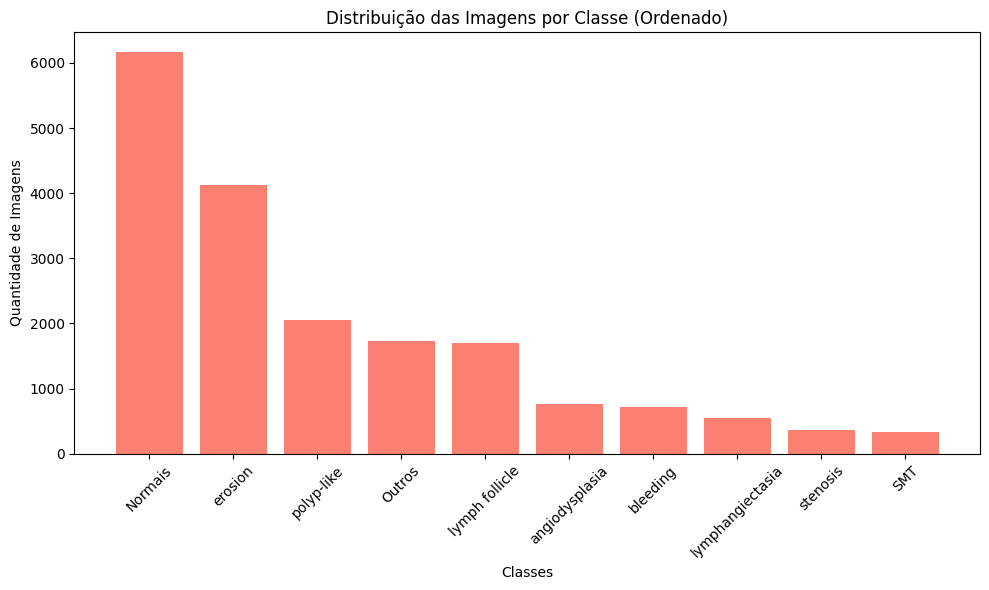

In [ ]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame pela quantidade de imagens
df_sorted = df.sort_values(by="Quantidade", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted["Classe"], df_sorted["Quantidade"], color='salmon')
plt.xlabel("Classes")
plt.ylabel("Quantidade de Imagens")
plt.title("Distribuição das Imagens por Classe (Ordenado)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualização de Imagens
Para obter uma visão inicial do dataset, selecionei algumas classes para exibir exemplos de imagens. Esta visualização permite observar a variabilidade de conteúdo visual e qualidade das imagens, que são fatores importantes a considerar durante o treino de redes neurais.

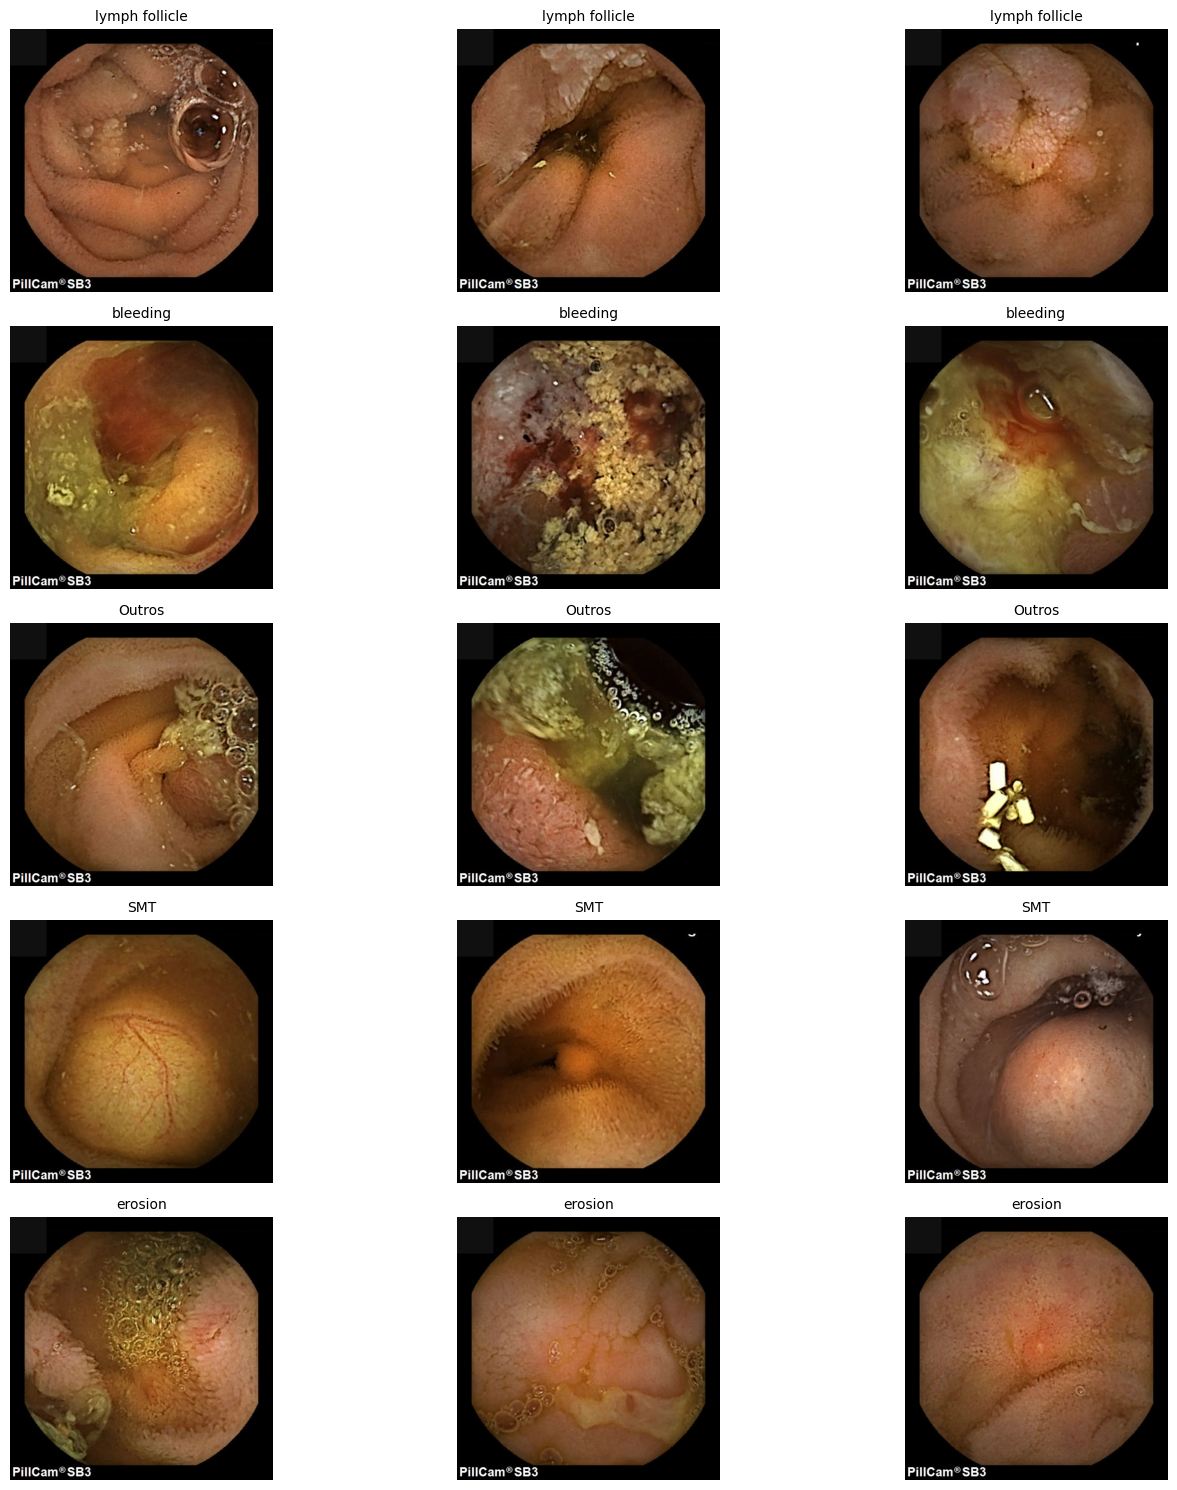

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Função para mostrar exemplos de imagens por classe
def mostrar_exemplos_imagens(base_dir, classes, num_imagens=3):
    plt.figure(figsize=(15, len(classes) * 3))  # Tamanho do grid
    image_index = 1
    
    for class_name in classes:
        class_path = os.path.join(base_dir, class_name)
        
        if os.path.exists(class_path):
            images = [
                os.path.join(class_path, img)
                for img in os.listdir(class_path)
                if img.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]
            
            for img_path in images[:num_imagens]:
                img = Image.open(img_path)
                plt.subplot(len(classes), num_imagens, image_index)
                plt.imshow(img)
                plt.title(class_name, fontsize=10)
                plt.axis("off")
                image_index += 1
    
    plt.tight_layout()
    plt.show()

# Lista de classes para mostrar exemplos
classes_para_mostrar = df["Classe"][:5]
mostrar_exemplos_imagens(base_dir, classes_para_mostrar, num_imagens=3)

## 1.3 - Estratégias de Classificação Consideradas

Com base nas características do dataset, planeio explorar diferentes estratégias de classificação para abordar os objetivos do projeto. Estas estratégias visam tanto a simplicidade na implementação inicial quanto a relevância clínica dos resultados.


### Classificação Binária
Uma abordagem inicial que estou a considerar é a classificação binária, onde o modelo seria configurado para distinguir entre duas classes principais:
- **Healthy**: Imagens normais, sem anomalias.
- **Não Healthy**: Imagens com qualquer tipo de anomalia.

Esta abordagem destaca-se pela simplicidade e eficiência, sendo particularmente útil numa fase inicial do projeto. O objetivo seria criar um modelo capaz de identificar, de forma geral, quais imagens necessitam de maior atenção médica. No entanto, estou ciente de que esta abordagem tem limitações, como a perda de especificidade clínica, já que todas as anomalias são agrupadas numa única classe. Para contextos médicos mais detalhados, isso pode ser insuficiente.

### Classificação Multi-Classe
Outra estratégia que planeio investigar é a classificação multi-classe, onde o modelo seria treinado para identificar diretamente cada uma das 10 classes presentes no dataset. Esta abordagem oferece a vantagem de permitir uma análise mais detalhada, podendo ser particularmente útil para diferenciar condições médicas específicas.

Contudo, prevejo que o desbalanceamento das classes será um desafio significativo. Classes como Healthy possuem milhares de imagens, enquanto outras, como SMT, têm menos de 400 exemplos. Este desbalanceamento pode criar enviesamento no modelo, favorecendo as classes dominantes. Além disso, o treino de um modelo multi-classe completo exige mais recursos computacionais, o que também será um fator a considerar.

### Classificação Multi-Classe com Classes Selecionadas
A estratégia que planeio adotar é a classificação multi-classe com classes selecionadas, que busca um equilíbrio entre simplicidade e relevância clínica. Nesta abordagem, o modelo será treinado considerando apenas as classes mais representativas do dataset, como **Healthy**, **Erosion**, **Polyp-like** e **Lymph Follicle**, escolhidas com base na sua relevância clínica e maior disponibilidade de dados.

Esta estratégia permite mitigar os desafios de desbalanceamento e complexidade computacional, ao mesmo tempo que garante resultados mais específicos e clínicos. Com um foco reduzido, o modelo será mais eficiente e capaz de generalizar para as classes selecionadas, oferecendo maior valor prático para os objetivos do projeto. Contudo, reconheço que a exclusão de classes menos representadas pode limitar a diversidade do modelo, algo que será cuidadosamente avaliado durante o desenvolvimento.

# 2. Estado da Arte

O Deep Learning, uma subárea do Machine Learning, tem registado avanços significativos na análise de imagens médicas, destacando-se como uma ferramenta poderosa para resolver desafios complexos em diagnósticos e deteção de anomalias. Na endoscopia por cápsula, uma técnica essencial para a visualização detalhada do trato gastrointestinal, as redes neuronais convolucionais (CNNs) têm demonstrado grande eficácia na análise automatizada de imagens, com o potencial de melhorar a precisão diagnóstica e reduzir o tempo necessário para a avaliação médica.

## 2.1. Deep Learning na Endoscopia por Cápsula

A endoscopia por cápsula, uma técnica avançada para a visualização do trato gastrointestinal, apresenta desafios inerentes à natureza estocástica dos dados, presença de artefactos e desbalanceamento das classes. Para abordar esses problemas, modelos baseados em redes neuronais convolucionais (CNNs) têm sido desenvolvidos com sucesso, alcançando altas precisões na deteção de marcos anatómicos em vídeos de endoscopia por cápsula. Além disso, técnicas como o Gradient-weighted Class Activation Mapping (Grad-CAM) têm sido aplicadas para interpretar as decisões dos modelos, aumentando a transparência e a confiança dos clínicos na utilização da IA.

## 2.2. Uso de Data Augmentation para Contornar Desafios
O desbalanceamento de classes e a variabilidade nas condições de captura de imagens são desafios recorrentes no uso de IA em imagiologia médica. Técnicas de data augmentation, como rotações, espelhamentos e ajustes de contraste, têm sido amplamente aplicadas para aumentar a diversidade do conjunto de dados e melhorar a robustez dos modelos. Estas abordagens não apenas mitigam os efeitos de conjuntos de dados limitados mas também ajudam a evitar sobreajustes, garantindo um melhor desempenho em novos dados clínicos.

## 2.3. Modelos Pré-Treinados e Transferência de Aprendizado
A utilização de modelos pré-treinados, como ResNet, EfficientNet e outras arquiteturas avançadas, tem demonstrado resultados promissores em contextos médicos. Ao ajustar esses modelos para tarefas específicas, como a classificação de imagens gastrointestinais, os investigadores conseguem aproveitar padrões já aprendidos em grandes conjuntos de dados, reduzindo o tempo de treino e melhorando a eficácia dos modelos.

## 2.4. Perspetivas Futuras

A aplicação de deep learning na endoscopia por cápsula enfrenta desafios importantes, como o desbalanceamento de classes, a variabilidade nas condições de captura das imagens e a necessidade de bases de dados mais diversificadas. O uso de técnicas como data augmentation (Garcea et al., 2022), transfer learning (Liang, 2020) e o desenvolvimento de modelos interpretáveis, como Grad-CAM (Sharma et al., 2020), pode ajudar a superar estas limitações.

Adicionalmente, a padronização de protocolos de aquisição de imagens e a criação de bases de dados públicas são essenciais para validar os modelos e fomentar a sua adoção clínica (Wu, 2022). Estes avanços têm o potencial de transformar significativamente o diagnóstico médico, permitindo análises mais rápidas e precisas.





# Referências


Sharma, P., Pante, A., & Gross, S. A. (2020). Artificial intelligence in endoscopy. Gastrointestinal Endoscopy, 91(4), 925-931. https://doi.org/10.1016/j.gie.2020.01.051

Garcea, F., Serra, A., Lamberti, F., & Morra, L. (2022). Data augmentation for medical imaging: A systematic literature review. Computers in Biology and Medicine, 106391. https://doi.org/10.1016/j.compbiomed.2022.106391

Liang, J. (2020). Image classification based on RESNET. Journal of Physics: Conference Series, 1634(1), 012110. https://doi.org/10.1088/1742-6596/1634/1/012110

Wu, J. (2022). Small sample datasets build powerful image classification models. Proceedings of SPIE: International Conference on Cloud Computing, Performance Computing, and Deep Learning (CCPCDL 2022), 122871V. https://doi.org/10.1117/12.2640983